In [2]:
from librerias import *

In [3]:
ruta_archivo = 'Data/btc_limp.csv' 

btc = pd.read_csv(ruta_archivo)
btc['Date'] = pd.to_datetime(btc['Date'])

In [4]:
btc_mes = btc.groupby(pd.Grouper(key='Date', freq='ME')).sum().reset_index()
btc_mes = btc_mes.loc['2014-01-05':]

btc_mes.head ()

,Date,Open,Change %
21,2012-04-30,135,0.82
22,2012-05-31,151,2.56
23,2012-06-30,165,26.32
24,2012-07-31,225,35.43
25,2012-08-31,324,20.47


In [8]:
btc_mes['EWM200'] = btc_mes['Open'].ewm(span=200).mean()
btc_mes['MA30'] = btc_mes ['Open'].rolling (30).mean ()

btc_mes ['>EWM200'] = np.where (btc_mes ['Open'] > btc_mes ['EWM200'],1,0)
btc_mes ['>MA30'] = np.where (btc_mes ['Open'] > btc_mes ['MA30'],1,0)


In [11]:
# Calculando los retornos

c

retornos

21          NaN
22     0.118519
23     0.092715
24     0.363636
25     0.440000
         ...   
160    0.196925
161    0.200744
162    0.012147
163    0.073132
164   -0.152171
Name: Open, Length: 144, dtype: float64

In [20]:
mejores = retornos.sort_values (ascending=False)[:20]
peores = retornos.sort_values (ascending=True)[:20]

print (mejores)
print (peores)

40     2.209008
32     1.430398
33     1.253653
89     1.012393
41     0.606173
126    0.595771
82     0.582456
31     0.527115
85     0.519992
106    0.454886
25     0.440000
88     0.402234
83     0.376299
24     0.363636
125    0.360789
124    0.351484
71     0.339503
118    0.335835
133    0.329228
87     0.329054
Name: Open, dtype: float64
43    -0.487921
91    -0.352868
101   -0.308801
54    -0.268384
131   -0.262389
143   -0.248117
116   -0.233339
45    -0.228103
95    -0.223291
142   -0.209345
50    -0.196144
100   -0.181440
138   -0.167192
55    -0.163625
51    -0.163214
137   -0.156647
57    -0.153227
93    -0.152609
164   -0.152171
130   -0.147772
Name: Open, dtype: float64


In [18]:
mejores200 = btc_mes.reindex (index = mejores.index)['>EWM200'].sum ()
mejores30 = btc_mes.reindex (index = mejores.index)['>MA30'].sum ()

print (mejores200)
print (mejores30)

20
13


In [19]:

peores200 = btc_mes.reindex (index = peores.index)['>EWM200'].sum ()
peores30 = btc_mes.reindex (index = peores.index)['>MA30'].sum ()

print (peores200)
print (peores30)

17
12


In [25]:
diez = btc_mes ['Change %'].sort_values (ascending=False)[10:].reindex (index=btc_mes['Date']).rename ("-10 mejores")
diez = (1+diez).cumprod ()

print (diez)

Date
2012-04-30   NaN
2012-05-31   NaN
2012-06-30   NaN
2012-07-31   NaN
2012-08-31   NaN
              ..
2023-11-30   NaN
2023-12-31   NaN
2024-01-31   NaN
2024-02-29   NaN
2024-03-31   NaN
Name: -10 mejores, Length: 144, dtype: float64


In [26]:
diez_p = btc_mes ['Change %'].sort_values (ascending=True)[:10].reindex (index=btc_mes['Date']).rename ("-10 peores")
diez_p = (1+diez_p).cumprod ()

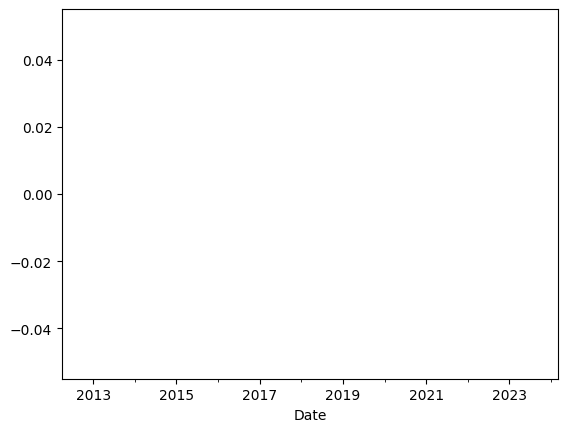

In [28]:
diez.plot ()
diez_p.plot ()

plt.show ()

In [5]:
btc = btc_mes.copy ()

In [6]:
btc.head ()

,Date,Open,Change %
21,2012-04-30,135,0.82
22,2012-05-31,151,2.56
23,2012-06-30,165,26.32
24,2012-07-31,225,35.43
25,2012-08-31,324,20.47


In [8]:
retornos = btc ['Open'].pct_change ()

cumulative_returns = (1+retornos).cumprod ()

In [9]:
cumulative_returns.fillna (1,inplace=True)

<Axes: >

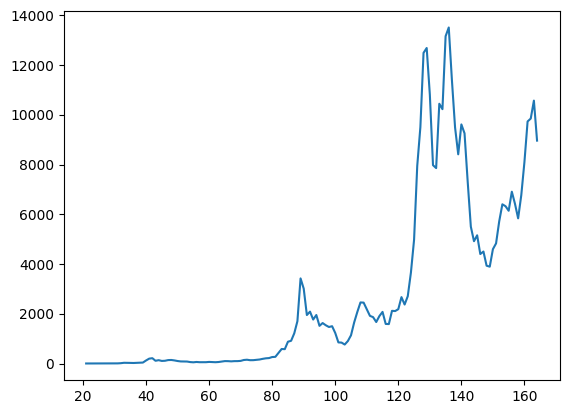

In [10]:
cumulative_returns.plot ()

<Axes: >

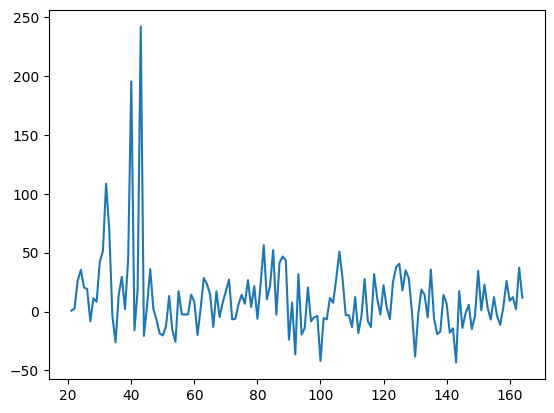

In [11]:
btc_mes ['Change %'].plot ()

In [14]:
cagr = cumulative_returns**(52/len(cumulative_returns))-1
cagr

21      0.000000
22      0.041275
23      0.075155
24      0.202575
25      0.371824
         ...    
160    24.795870
161    26.557554
162    26.677969
163    27.392489
164    25.749444
Name: Open, Length: 144, dtype: float64

<Axes: >

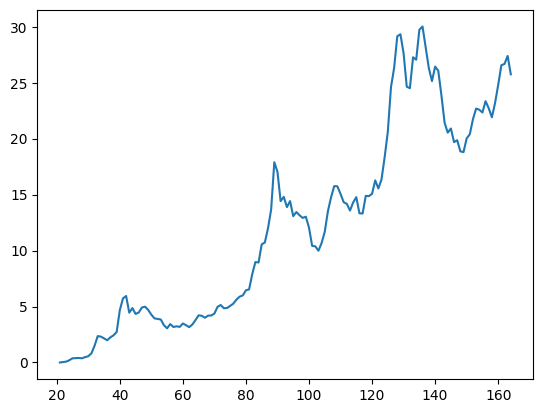

In [13]:
cagr.plot ()